<a href="https://colab.research.google.com/github/Yongtae723/personal_study_code/blob/main/multi_lunguage_embedding_for_Oota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bert-for-tf2
!pip install tensorflow_text
!pip install langdetect
!apt-get -y install fonts-ipafont-gothic
!rm /root/.cache/matplotlib/fontlist-v310.json 
!pip install faiss-gpu


     |████████████████████████████████| 51kB 3.3MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-cp37-none-any.whl size=30535 sha256=559d42f7b57e2316322e7a94408e8d1dc5a0f553373fdf9ab7af57e99a6a9819
  Stored in directory: /root/.cache/pip/wheels/a1/04/ee/347bd9f5b821b637c76411d280271a857aece00358896a230f
  Created wheel for py-params: filename=py_params-0.10.2-cp37-none-any.whl size=7912 sha256=8664f01ee454e52382a9ceb4ef2f4b8aa22f5194bd7d3c25abb95d55f5a97d7d
  Stored in directory: /root/.cache/pip/wheels/d0/4a/70/ff12450229ff1955abf01f365051d4faae1c20aef53ab4cf09
  Created wheel for params-flow: filename=params_flow-0.8.2-cp37-none-any.whl size=19472 sha256=a318f761478f8b56f6961e0b7b304eff687280f98486e2bb1a2fbc165d78e678
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow
     |████████████████████████████████| 3.4MB 5.9MB/s 
     |████████████████████████████

In [ ]:
!ls -ll /root/.cache/matplotlib/

total 52
-rw-r--r-- 1 root root 46443 Mar 12 14:47 fontList.json
drwxr-xr-x 2 root root  4096 Mar 12 14:28 tex.cache


In [ ]:
import bert
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # Needed for loading universal-sentence-encoder-cmlm/multilingual-preprocess
import seaborn as sns
sns.set(font = "IPAPGothic")


In [ ]:
!pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
astor==0.8.1
astropy==4.2
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.3.0
audioread==2.1.9
autograd==1.3
Babel==2.9.0
backcall==0.2.0
beautifulsoup4==4.6.3
bert-for-tf2==0.14.9
bleach==3.3.0
blis==0.4.1
bokeh==2.3.0
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.2.1
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.5
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.22
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
dlib==19.18.0
dm-tree==0.1.5
docopt==0.6.2
d

## dataのimportと確認


In [ ]:
yokohama_df = pd.read_csv("yokohama_qanda.csv", encoding="shift-jis", index_col=0)
yokohama_df.head(500)

,Question,Answer,URL
0,特別養護老人ホーム入退所指針の見直しのポイントは何ですか。またどのような項目になっていますか。,特別養護老人ホーム入退所指針検討委員会での意見を踏まえ、介護を必要とする入所希望者本人の状況...,https://qa.city.yokohama.lg.jp/search-detail/1
1,要支援１または２ですが特別養護老人ホームへ入所申込できますか。,特別養護老人ホームの利用は要介護１以上の方が対象となります。このため要支援１・２では利用する...,https://qa.city.yokohama.lg.jp/search-detail/2
2,よこはま動物園ズーラシアの植物・花などにはどんなものがありますか。,ズーラシアでは、「生命の共生、自然との調和」をテーマにして、「熱帯」や「亜寒帯」などの「気...,https://qa.city.yokohama.lg.jp/search-detail/3
3,土地の所有者など、登記の内容を知りたいのですが。,土地の所有者等の登記記録は、国の機関である法務局（登記所）に備え付けられている不動産登記簿...,https://qa.city.yokohama.lg.jp/search-detail/5
4,特別養護老人ホームの入所申込書が欲しいがどこで手に入るか,各区役所高齢（・障害）支援課、地域ケアプラザ、市内特別養護老人ホーム、健康福祉局高齢施設課に...,https://qa.city.yokohama.lg.jp/search-detail/6
...,...,...,...
495,都市計画道路予定地ですが、未整備なので売ってもらえませんか？もしくは、貸してもらえませんか？,現在は未整備であっても、今後道路として整備する予定がありますので、詳細については【道路局企画...,https://qa.city.yokohama.lg.jp/search-detail/819
496,青葉区区政運営方針について知りたい,青葉区区政運営方針については、青葉区区政推進課企画調整係にお問い合わせください。また、方針...,https://qa.city.yokohama.lg.jp/search-detail/820
497,シニアボランティアに登録するにはどうすればいいですか。,市が開催する登録研修会を受講してください。研修会終了時にポイントカードを交付します。 その...,https://qa.city.yokohama.lg.jp/search-detail/821
498,青葉区ドッグランについて,あおばドッグランは、谷本公園（下谷元町31-10）の駐車場の隣に期間限定で設置された施設です...,NaN


In [ ]:
yokohama_df.describe()

,Question,Answer,URL
count,2110,2109,2108
unique,2110,2109,2108
top,退職した従業員の給与支払報告書は提出する必要があるか。,都市計画による制限について調べる場合と、その他建築造成、地域まちづくりの制限について調べる場...,https://qa.city.yokohama.lg.jp/search-detail/199
freq,1,1,1


In [ ]:
yokohama_df.shape

(2111, 3)

###データの前処理


In [ ]:
yokohama_df.dtypes

Question    object
Answer      object
URL         object
dtype: object

In [ ]:
yokohama_df.isnull().any()

Question    True
Answer      True
URL         True
dtype: bool

In [ ]:
yokohama_df.isnull().values.sum()

6

### 欠損値の除去


In [ ]:
yokohama_df = yokohama_df.dropna(how = "any", axis=0)

In [ ]:
yokohama_df.head()

,Question,Answer,URL
0,特別養護老人ホーム入退所指針の見直しのポイントは何ですか。またどのような項目になっていますか。,特別養護老人ホーム入退所指針検討委員会での意見を踏まえ、介護を必要とする入所希望者本人の状況...,https://qa.city.yokohama.lg.jp/search-detail/1
1,要支援１または２ですが特別養護老人ホームへ入所申込できますか。,特別養護老人ホームの利用は要介護１以上の方が対象となります。このため要支援１・２では利用する...,https://qa.city.yokohama.lg.jp/search-detail/2
2,よこはま動物園ズーラシアの植物・花などにはどんなものがありますか。,ズーラシアでは、「生命の共生、自然との調和」をテーマにして、「熱帯」や「亜寒帯」などの「気...,https://qa.city.yokohama.lg.jp/search-detail/3
3,土地の所有者など、登記の内容を知りたいのですが。,土地の所有者等の登記記録は、国の機関である法務局（登記所）に備え付けられている不動産登記簿...,https://qa.city.yokohama.lg.jp/search-detail/5
4,特別養護老人ホームの入所申込書が欲しいがどこで手に入るか,各区役所高齢（・障害）支援課、地域ケアプラザ、市内特別養護老人ホーム、健康福祉局高齢施設課に...,https://qa.city.yokohama.lg.jp/search-detail/6


In [ ]:
yokohama_df.describe()

,Question,Answer,URL
count,2108,2108,2108
unique,2108,2108,2108
top,退職した従業員の給与支払報告書は提出する必要があるか。,都市計画による制限について調べる場合と、その他建築造成、地域まちづくりの制限について調べる場...,https://qa.city.yokohama.lg.jp/search-detail/199
freq,1,1,1


## Universal Sentense Encode(USE) Model


In [ ]:
model_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3'
encoder = hub.KerasLayer(model_url, trainable=False)

In [ ]:
import json


model_detail = {
    "model_folder":None,
    "model_name" : "USE"
}
with open( 'model_detail.json', mode='wt', encoding='utf-8') as file:
    json.dump(model_detail, file, ensure_ascii=False, indent=2)

In [ ]:
with open( 'model_detail.json', mode='rt', encoding='utf-8') as file:
    data = json.load(file)

In [ ]:
data

{'model_folder': None, 'model_name': 'USE'}

### USEがうまく動作しているかの確認


In [ ]:
def plot_similarity(xlabels, ylabels, corr, rotation=90):
  sns.set(font_scale=1.2, font='IPAGothic')
  g = sns.heatmap(
      corr,
      xticklabels=xlabels,
      yticklabels=ylabels,
      vmin=0,
      vmax=1,
      cmap='YlOrRd')
  g.set_xticklabels(xlabels, rotation=rotation)
  g.set_title('Semantic Textual Similarity')


def truncate(sent, max_len=15):
  return sent if len(sent) <= max_len else sent[:max_len] + '...'


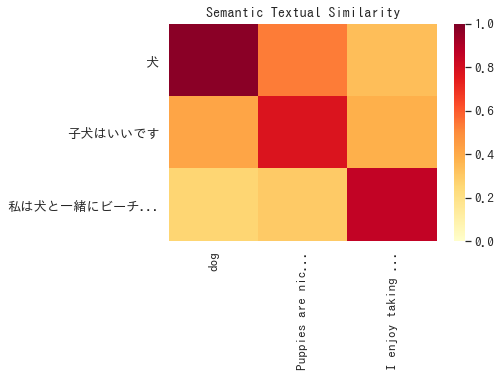

In [ ]:
english_sentences = [
  'dog',
  'Puppies are nice.',
  'I enjoy taking long walks along the beach with my dog.'
]

japanese_sentences = [
  '犬',
  '子犬はいいです',
  '私は犬と一緒にビーチを散歩するのが好きです'
]

english_embeddings = encoder(english_sentences)
japanese_embeddings = encoder(japanese_sentences)

english_sentences = [truncate(sent) for sent in english_sentences]
japanese_sentences = [truncate(sent, 10) for sent in japanese_sentences]

plot_similarity(
    xlabels=english_sentences,
    ylabels=japanese_sentences,
    corr=np.matmul(english_embeddings, np.transpose(japanese_embeddings))
)

In [ ]:
# embeddingの確認
print(japanese_embeddings[0].numpy().shape)

(512,)


##いくつかの例


In [ ]:
# 出典: https://qiita.com/sonoisa/items/775ac4c7871ced6ed4c3 で公開されている「いらすとや」さんの画像タイトル抜粋（「のイラスト」「のマーク」「のキャラクター」という文言を削った）
sentences = ["お辞儀をしている男性会社員", "笑い袋", "テクニカルエバンジェリスト（女性）", "戦うAI", "笑う男性（5段階）", 
"漫才師", "お辞儀をしている医者（女性）", "お辞儀をしている薬剤師", "福笑いをしている人", "AIの家族", "コント師", 
"福笑い（女性）", "お辞儀をしている犬", "苦笑いをする女性", "お辞儀をしている医者", "いろいろな漫符", 
"雛人形「仕丁・三人上戸」", "ダンス「踊る男性」", "拍手をしている人", "定年（男性）", "ものまね芸人", "福笑いのおたふく", 
"お辞儀をしている看護師（男性）", "愛想笑い", "福笑い（ひょっとこ）", "成長する人工知能", "苦笑いをする男性", 
"運動会「徒競走・白組」", "人工知能と喧嘩をする人", "人工知能", "ありがた迷惑", "お辞儀をしているクマ", "笑う女性（5段階）", 
"人工知能とメールをする人（男性）", "技術書", "笑いをこらえる人（女性）", "ダンス「踊る女性」", "お辞儀をしている猫", 
"福笑い（男性）", "武器を持つAI", "作曲する人工知能", "縄跳びを飛んでいる女性", "福笑い（おかめ）", "茅の輪くぐり", "表情", 
"AIと仲良くなる人間", "お笑い芸人「漫才師」", "人工知能とメールをする人（女性）", "人工知能と戦う囲碁の棋士", "拍手している女の子", 
"検索する人工知能", "ピースサインを出す人（女性）", "啓示を受けた人（女性）", "仕事をする人工知能", "一輪車に乗る女の子", 
"お辞儀をしているウサギ", "走る猫（笑顔）", "人工知能と戦う将棋の棋士", "遠足「お弁当・男の子・女の子」", "心を持ったAI", 
"プレゼントをもらって喜ぶ女の子", "技術書（バラバラ）", "いろいろな表情の酔っぱらい（男性）", "拍手している人（棒人間）", 
"仕事を奪う人工知能", "文章を書く人工知能", "いろいろな映画の「つづく」", "絵を描く人工知能", "拍手している男の子", "ハリセン", 
"人工知能と仲良くする人たち", "ON AIRランプ", "いろいろな表情の酔っぱらい（女性）", "徹夜明けの笑顔（女性）", 
"徹夜明けの笑顔（男性）", "お辞儀をしている女性会社員", "バンザイをしているお婆さん", "画像認識をするAI", 
"芸人の男の子（将来の夢）", "料理「女性」", "ピコピコハンマー", "鏡を見る人（笑顔の男性）", "笑いをこらえる人（男性）", 
"シンギュラリティ", "人工知能に仕事を任せる人", "スマートスピーカー", "学ぶ人工知能", "人工知能・AI", "英語のアルファベット", 
"お金を見つめてニヤけている男性", "「ありがとう」と言っている人", "定年（女性）", "テクニカルエバンジェリスト（男性）", 
"スタンディングオベーション"]

In [ ]:
sentence_vectors = encoder(sentences)
print(sentence_vectors)

tf.Tensor(
[[-0.05619374 -0.00324968  0.05633616 ...  0.00672434  0.00676094
  -0.01215081]
 [ 0.0047473   0.04069067 -0.04086053 ... -0.00758306 -0.01488729
   0.0109582 ]
 [-0.0737422   0.0531266   0.01676407 ...  0.00130996  0.06208597
   0.01881845]
 ...
 [-0.00782285  0.01450852 -0.03949658 ... -0.06554244  0.03052686
  -0.00119799]
 [-0.08309428  0.06732935  0.0005497  ...  0.01283657  0.03985387
   0.03395784]
 [-0.03411075  0.00431162 -0.05394462 ...  0.00486161 -0.04052155
   0.03028554]], shape=(94, 512), dtype=float32)


In [ ]:
import scipy.spatial

queries = ['暴走したAI', '暴走した人工知能', 'いらすとやさんに感謝', '最小の人間']
query_embeddings = encoder(queries)

closest_n = 5
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], sentence_vectors, metric="cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])
    print(results)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:closest_n]:
        print(sentences[idx].strip(), "(Score: %.4f)" % (distance / 2))

[(3, 0.19492902308578786), (59, 0.31892056763117727), (39, 0.33665947974012933), (87, 0.3691384106532919), (9, 0.4298505075541458), (77, 0.4347338947439543), (45, 0.4982982987587613), (28, 0.6059224140148984), (64, 0.6071029286353428), (29, 0.6584216124688809), (86, 0.6595810148452335), (71, 0.6710907953864669), (53, 0.6919860649671012), (57, 0.6969173461951435), (48, 0.7035501597630542), (25, 0.7054751015933319), (50, 0.7214289795847302), (40, 0.7340287033707655), (70, 0.7383109779182899), (67, 0.7578027541361327), (66, 0.7652485265404256), (84, 0.7703215387001754), (76, 0.7779004451826204), (88, 0.7816848712720981), (62, 0.7901878937378938), (30, 0.7920039983084787), (65, 0.7936534980699167), (72, 0.7952018937211454), (44, 0.8019899639102172), (31, 0.8097072715261624), (34, 0.8164359440777951), (33, 0.8243487255890841), (61, 0.8336711994036283), (23, 0.8338669434536746), (92, 0.8355043603561585), (20, 0.8417331478775372), (56, 0.841831311560014), (12, 0.8424514516365305), (42, 0.8428

##横浜市のQ-Q類似度


In [ ]:
question_list = yokohama_df.Question.tolist()
print(question_list)
print(len(question_list))

['特別養護老人ホーム入退所指針の見直しのポイントは何ですか。またどのような項目になっていますか。', '要支援１または２ですが特別養護老人ホームへ入所申込できますか。', 'よこはま動物園ズーラシアの植物・花などにはどんなものがありますか。', '土地の所有者など、登記の内容を知りたいのですが。', '特別養護老人ホームの入所申込書が欲しいがどこで手に入るか', '特別養護老人ホームへの入所待ち期間は考慮されないのですか', '整備工事中の公園について教えてほしい。', 'プレジャーボートを買うのですが、市内に保管できる場所がありますか。', '日産スタジアム（横浜国際総合競技場）に駐車場はありますか。', '日産スタジアム（横浜国際総合競技場）駐車場の料金は？', '日産スタジアム（横浜国際総合競技場）の中を見学できますか。', 'ワールドカップスタジアムツアーの開催日と概要を教えてください。', '死亡届はどこに届出するのですか。また、届出するときに持参するものは何ですか。', '氏を変更（改姓）したいのですが、変更することはできますか。また、どのように手続きするのですか。', '名前を変更（改名）したいのですが、変更することはできますか。また、どのように手続きするのですか。', '区役所の休庁日や受付時間外にも婚姻届などの戸籍に関する届出ができますか。', '戸籍の届出をしたその日に戸籍全部事項証明（謄本）等を発行してもらえますか。', '屋外に広告を掲出したいのですが、どのような手続きがありますか', '従前の本籍（出生当時の戸籍や婚姻前の戸籍など）はどのように確認するのですか。', '地籍調査とは何ですか。', '地籍図と地積測量図の違いを知りたいのですが。', '今の『「ヨコハマ３Ｒ夢（スリム）！」広報大使』は誰がいるのか？', '地籍調査の実施地区が知りたいのですが。', '地籍調査の成果を閲覧したいのですが。', '『「ヨコハマ３Ｒ夢（スリム）！」広報大使』の活動内容について知りたい', 'よこはま動物園ズーラシアでの精算にクレジットカードは使えますか？', 'よこはま動物園ズーラシアのレストランの予約はできますか？', 'よこはま動物園ズーラシアへの行き方を教えてください。', 'よこはま動物園ズーラシアについて教えてください。', '公証相談を

In [ ]:
sentence_vectors_yokohama = encoder(question_list)

print(sentence_vectors_yokohama)

tf.Tensor(
[[ 0.02433121  0.05191706 -0.00657172 ...  0.05775026 -0.01156933
  -0.00668447]
 [-0.05435084 -0.0214193  -0.01370591 ...  0.00173505 -0.03224121
   0.03028968]
 [ 0.0565853   0.03005039  0.00686145 ...  0.01127097 -0.02099345
  -0.01379594]
 ...
 [ 0.00755688 -0.00552825  0.03006781 ... -0.05511114 -0.0585687
  -0.04652763]
 [-0.01501863 -0.05002019  0.05723513 ...  0.07960279  0.0219606
  -0.00302547]
 [-0.04075966 -0.07275062  0.07486731 ...  0.05740269 -0.00583071
   0.00677623]], shape=(2108, 512), dtype=float32)


In [ ]:
import scipy.spatial

queries = ["ガラスの廃棄の仕方", 'トイレで水漏れがする', '図書館は何がありますか？', 'ドッグランの施設はありますか？',"育児の補助金は何かありますか？"]
query_embeddings = encoder(queries)

closest_n = 5
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], sentence_vectors_yokohama, metric="cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:closest_n]:
        print(idx)
        print(question_list[idx].strip(), "(Score: %.4f)" % (distance / 2))





Query: ガラスの廃棄の仕方

Top 5 most similar sentences in corpus:
1140
発泡スチロールの処分の仕方 (Score: 0.1588)
996
産業廃棄物を排出しますが、どのように処理すればよいのですか。 (Score: 0.1607)
1044
消火器はどのように廃棄すればよいか (Score: 0.1738)
465
粗大ごみを直接持ち込んで処分したい。（自己搬入の持込場所はどこか。） (Score: 0.1773)
813
古い灯油（ガソリン、軽油等）を処分したいのですが、どうしたらよいですか。 (Score: 0.1791)




Query: トイレで水漏れがする

Top 5 most similar sentences in corpus:
433
トイレの漏水について (Score: 0.0270)
432
宅地内で水漏れしている (Score: 0.1000)
469
トイレを水洗にしたいのですが。 (Score: 0.1577)
1401
下水が詰まったが、どうすればいいですか。 (Score: 0.1620)
884
公衆トイレが故障（便器や設備の破損、水が止まらないなど）している (Score: 0.1745)




Query: 図書館は何がありますか？

Top 5 most similar sentences in corpus:
507
図書館はどこにありますか。 (Score: 0.0639)
356
読みたい本が図書館にあるかどうか調べたいのですが。 (Score: 0.1709)
508
図書館の本は何冊まで借りられますか。 (Score: 0.2015)
821
移動図書館を利用したいが、どうすればいいですか。 (Score: 0.2076)
859
図書館で本を借りたいのですが、どうしたらいいですか。 (Score: 0.2114)




Query: ドッグランの施設はありますか？

Top 5 most similar sentences in corpus:
1075
公園で犬を放していいのですか。 (Score: 0.2231)
766
動物園には身体障害者補助犬を伴って入園することができますか？ (Score: 0.2246)
321
介護保険で利用で

In [ ]:
import scipy.spatial

queries = ["How to throw away glass", 'Water leaks in the toilet', 'Where is the library?', 'Is there a dog run facility?',"Are there any childcare subsidies"]
query_embeddings = encoder(queries)

closest_n = 5
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], sentence_vectors_yokohama, metric="cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:closest_n]:
        print(question_list[idx].strip(), "(Score: %.4f)" % (distance / 2))





Query: How to throw away glass

Top 5 most similar sentences in corpus:
われたもの（ガラス・陶器など）の出し方 (Score: 0.1712)
消火器はどのように廃棄すればよいか (Score: 0.2274)
発泡スチロールの処分の仕方 (Score: 0.2598)
事業系ごみは、どのように分別したらよいか (Score: 0.2621)
傘の出し方 (Score: 0.2653)




Query: Water leaks in the toilet

Top 5 most similar sentences in corpus:
トイレの漏水について (Score: 0.0893)
宅地内で水漏れしている (Score: 0.1384)
トイレを水洗にしたいのですが。 (Score: 0.1721)
水道料金を支払っているのに水が止まった (Score: 0.1821)
公衆トイレが故障（便器や設備の破損、水が止まらないなど）している (Score: 0.1831)




Query: Where is the library?

Top 5 most similar sentences in corpus:
図書館はどこにありますか。 (Score: 0.0635)
読みたい本が図書館にあるかどうか調べたいのですが。 (Score: 0.2003)
移動図書館を利用したいが、どうすればいいですか。 (Score: 0.2195)
読みたい本が図書館の本棚にないときは、どうしたら良いですか。 (Score: 0.2314)
図書館で本を借りたいのですが、どうしたらいいですか。 (Score: 0.2356)




Query: Is there a dog run facility?

Top 5 most similar sentences in corpus:
公園で犬を放していいのですか。 (Score: 0.2385)
建物を建てるときの駐車場設置について、きまりはありますか？ (Score: 0.2524)
動物園には身体障害者補助犬を伴って入園することができますか？ (Score: 0.2560)
公園に車で行きたいのですが、駐車場はありますか。 (Score:

## LaBSEモデル(https://colab.research.google.com/drive/1DeaI-D96BhRf_meLGVNNGy3kXe1Jjh74?usp=sharing#scrollTo=Xf7c4O9AlxC5)

In [ ]:
model_url = 'https://tfhub.dev/google/LaBSE/2'
encoder = hub.KerasLayer(model_url, trainable=False)
preprocessor = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2")

In [ ]:
encoder.get_input_info_dict()    

AttributeError: ignored

In [ ]:
def normalization(embeds):
  norms = np.linalg.norm(embeds, 2, axis=1, keepdims=True)
  return embeds/norms

In [ ]:
# 出典: https://qiita.com/sonoisa/items/775ac4c7871ced6ed4c3 で公開されている「いらすとや」さんの画像タイトル抜粋（「のイラスト」「のマーク」「のキャラクター」という文言を削った）
sentences = ["お辞儀をしている男性会社員", "笑い袋", "テクニカルエバンジェリスト（女性）", "戦うAI", "笑う男性（5段階）", 
"漫才師", "お辞儀をしている医者（女性）", "お辞儀をしている薬剤師", "福笑いをしている人", "AIの家族", "コント師", 
"福笑い（女性）", "お辞儀をしている犬", "苦笑いをする女性", "お辞儀をしている医者", "いろいろな漫符", 
"雛人形「仕丁・三人上戸」", "ダンス「踊る男性」", "拍手をしている人", "定年（男性）", "ものまね芸人", "福笑いのおたふく", 
"お辞儀をしている看護師（男性）", "愛想笑い", "福笑い（ひょっとこ）", "成長する人工知能", "苦笑いをする男性", 
"運動会「徒競走・白組」", "人工知能と喧嘩をする人", "人工知能", "ありがた迷惑", "お辞儀をしているクマ", "笑う女性（5段階）", 
"人工知能とメールをする人（男性）", "技術書", "笑いをこらえる人（女性）", "ダンス「踊る女性」", "お辞儀をしている猫", 
"福笑い（男性）", "武器を持つAI", "作曲する人工知能", "縄跳びを飛んでいる女性", "福笑い（おかめ）", "茅の輪くぐり", "表情", 
"AIと仲良くなる人間", "お笑い芸人「漫才師」", "人工知能とメールをする人（女性）", "人工知能と戦う囲碁の棋士", "拍手している女の子", 
"検索する人工知能", "ピースサインを出す人（女性）", "啓示を受けた人（女性）", "仕事をする人工知能", "一輪車に乗る女の子", 
"お辞儀をしているウサギ", "走る猫（笑顔）", "人工知能と戦う将棋の棋士", "遠足「お弁当・男の子・女の子」", "心を持ったAI", 
"プレゼントをもらって喜ぶ女の子", "技術書（バラバラ）", "いろいろな表情の酔っぱらい（男性）", "拍手している人（棒人間）", 
"仕事を奪う人工知能", "文章を書く人工知能", "いろいろな映画の「つづく」", "絵を描く人工知能", "拍手している男の子", "ハリセン", 
"人工知能と仲良くする人たち", "ON AIRランプ", "いろいろな表情の酔っぱらい（女性）", "徹夜明けの笑顔（女性）", 
"徹夜明けの笑顔（男性）", "お辞儀をしている女性会社員", "バンザイをしているお婆さん", "画像認識をするAI", 
"芸人の男の子（将来の夢）", "料理「女性」", "ピコピコハンマー", "鏡を見る人（笑顔の男性）", "笑いをこらえる人（男性）", 
"シンギュラリティ", "人工知能に仕事を任せる人", "スマートスピーカー", "学ぶ人工知能", "人工知能・AI", "英語のアルファベット", 
"お金を見つめてニヤけている男性", "「ありがとう」と言っている人", "定年（女性）", "テクニカルエバンジェリスト（男性）", 
"スタンディングオベーション"]

sentences_tf = tf.constant(sentences)

In [ ]:
inputs = preprocessor(sentences_tf)
print(inputs)
sentence_vectors =  encoder(inputs)["default"]
sentence_vectors = normalization(sentence_vectors)
print(sentence_vectors)

{'input_word_ids': <tf.Tensor: shape=(94, 128), dtype=int32, numpy=
array([[   101,   3679,  10607, ...,      0,      0,      0],
       [   101,   8675,   3673, ...,      0,      0,      0],
       [   101,   3794,  70521, ...,      0,      0,      0],
       ...,
       [   101,   5495,   5792, ...,      0,      0,      0],
       [   101,   3794,  70521, ...,      0,      0,      0],
       [   101,   3781, 216685, ...,      0,      0,      0]], dtype=int32)>, 'input_mask': <tf.Tensor: shape=(94, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>, 'input_type_ids': <tf.Tensor: shape=(94, 128), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0,

In [ ]:
queries = ['暴走したAI', '暴走した人工知能', 'いらすとやさんに感謝', 'つづく']
tf_queries = tf.constant(tf_queries)
query_embeddings = encoder(preprocessor(tf_queries))["default"]
query_embeddings = normalization(query_embeddings)

closest_n = 5
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], sentence_vectors, metric="cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])
    print(results)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:closest_n]:
        print(sentences[idx].strip(), "(Score: %.4f)" % (distance / 2))

[(3, 0.3072846280515239), (59, 0.4179751887010077), (39, 0.4612557266886056), (87, 0.49532924989061466), (45, 0.5061806109118627), (77, 0.530392481051263), (9, 0.543101427891334), (64, 0.5449297098573277), (28, 0.5516767983261062), (53, 0.5991629365298601), (25, 0.6001838351099206), (40, 0.6182991866098007), (67, 0.6240563256357989), (29, 0.6277040046192286), (50, 0.6367240920118914), (86, 0.6438153959464193), (84, 0.6510573841183593), (56, 0.6705185875814691), (70, 0.6887397876094234), (65, 0.6942450907660427), (41, 0.704049516046348), (71, 0.7053989469143226), (5, 0.7174883326718708), (26, 0.7180565233896279), (12, 0.7202274578316314), (63, 0.7269338361690101), (48, 0.7282762397492129), (57, 0.7358292197147768), (8, 0.7381797219501813), (23, 0.7402991560938494), (13, 0.7422892975620826), (68, 0.7468164367099713), (54, 0.7484752811370643), (33, 0.7502012351899738), (18, 0.7610764066484403), (31, 0.7613519748912897), (47, 0.7615130859676408), (37, 0.7656897606859283), (49, 0.7717826782

In [ ]:
question_list = yokohama_df.Question.tolist()

interval = 100
for i,embedding_start in enumerate(range(0,len(question_list), interval)):
  if embedding_start + interval < len(question_list):
    embedding_range_end  = embedding_start +interval
  else:
    embedding_range_end = len(question_list)

  question_list_tf = tf.constant(question_list[embedding_start:embedding_range_end])
  inputs = preprocessor(question_list_tf)
  sentence_vectors_tf =  encoder(inputs)["default"]
  if i == 0:
    sentence_vectors_np = normalization(sentence_vectors_tf)
  else:
    sentence_vectors_np = np.concatenate((sentence_vectors_np,normalization(sentence_vectors_tf)),axis = 0)
  

print(sentence_vectors_np.shape)
print(type(sentence_vectors_np))

(2108, 768)
<class 'numpy.ndarray'>


     |████████████████████████████████| 89.4MB 51kB/s 


In [ ]:
queries = ["How to throw away the glass", 'Water leaks in the toilet', 'Where is the library?', 'Is there a dog run facility?',"Are there any childcare subsidies"]
# queries = ["ガラスの廃棄の仕方", 'トイレで水漏れがする', '図書館は何がありますか？', 'ドッグランの施設はありますか？',"育児の補助金は何かありますか？"]
query_embeddings = encoder(preprocessor(queries))
query_embeddings = normalization(query_embeddings["default"])
# query_embeddings_np = query_embeddings.numpy()


In [ ]:
# queries = ['暴走したAI', '暴走した人工知能', 'いらすとやさんに感謝', 'つづく']
# tf_queries = tf.constant(tf_queries)
# query_embeddings = encoder(preprocessor(tf_queries))["default"]
# query_embeddings = normalization(query_embeddings)
import scipy.spatial
closest_n = 5
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], sentence_vectors_np, metric="cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])
    print(results)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:closest_n]:
        print(idx)
        print(question_list[idx].strip(), "(Score: %.4f)" % (distance / 2))

[(1142, 0.33227371037815234), (1044, 0.351327050374447), (426, 0.418803547206009), (429, 0.4347015807680007), (1140, 0.4363227402213302), (1091, 0.474699809874343), (409, 0.5289918390771982), (515, 0.5362596668756794), (484, 0.5367250811576838), (2023, 0.5404979123092455), (1218, 0.5475217093546775), (414, 0.5645129878722492), (344, 0.57258816657408), (2107, 0.5825795605535873), (1117, 0.5872386623110617), (1090, 0.5896253130005531), (996, 0.5914414286699217), (197, 0.5939773499729306), (1875, 0.5944644547780058), (381, 0.612258495497169), (92, 0.6166112306965797), (1748, 0.6223097198492924), (576, 0.6247575144105972), (232, 0.6272407530938224), (514, 0.6285971921444206), (421, 0.6299651905053544), (2106, 0.6307496279784808), (1058, 0.6330484405714034), (1433, 0.634470438467087), (1924, 0.6350486005956213), (103, 0.6352461948554664), (252, 0.6355525668206694), (1848, 0.6401581049641294), (813, 0.6407077486298219), (177, 0.6425397317793685), (397, 0.6442138694632947), (651, 0.6463399512

In [ ]:
import faiss
index = faiss.IndexFlatIP(sentence_vectors_np.shape[1])
index.add(normalization(sentence_vectors_np))

In [ ]:
index.search(np.atleast_2d(query_embeddings.numpy()[0]),5)

(array([[0.66772616, 0.6486728 , 0.58119684, 0.5652985 , 0.56367743]],
       dtype=float32), array([[1142, 1044,  426,  429, 1140]]))

In [ ]:
embedding = query_embeddings.numpy()[0]

In [ ]:
# normalized_embedding = / np.linalg.norm(embedding)
normalized_embedding = np.atleast_2d(embedding)/ np.linalg.norm(embedding)
scores, indices = index.search(normalized_embedding, 5)
scores, indices = scores[0], indices[0]

In [ ]:
scores, indices

(array([[0.66772616, 0.6486728 , 0.58119684, 0.5652985 , 0.56367743]],
       dtype=float32), array([[1142, 1044,  426,  429, 1140]]))

In [ ]:
query_embeddings

<tf.Tensor: shape=(5, 768), dtype=float32, numpy=
array([[-0.00093639, -0.02222647, -0.0327903 , ..., -0.01483916,
        -0.0295632 ,  0.0411455 ],
       [-0.05496163, -0.05505491,  0.01207532, ..., -0.05357183,
        -0.03471528,  0.0124142 ],
       [-0.04795488, -0.02573423, -0.05267552, ..., -0.01609408,
        -0.00422578,  0.02394629],
       [ 0.02564754,  0.02194745, -0.02589669, ..., -0.00886488,
        -0.04422006, -0.0375817 ],
       [ 0.00282799, -0.01571648, -0.05203636, ..., -0.00414213,
        -0.0292901 , -0.0516954 ]], dtype=float32)>

In [ ]:
return_df = yokohama_df.iloc[indices].copy()
return_df["scoer"] = pd.Series(scores, index=return_df.index)

In [ ]:
return_df

,Question,Answer,URL,scoer
1143,傘の出し方,まず、金属製の骨組と布部分に分けてください。そして、金属製の骨組みは、週１回の「小さな金属...,https://qa.city.yokohama.lg.jp/search-detail/1982,0.667726
1045,消火器はどのように廃棄すればよいか,ご家庭や職場でお持ちの消火器を廃棄する場合は、消火器リサイクル推進センターにお問い合わせく...,https://qa.city.yokohama.lg.jp/search-detail/1794,0.648673
426,古布の出し方,古布は、洗濯して乾いているものを中身がはっきりと確認できる半透明の袋に入れて出してください。...,https://qa.city.yokohama.lg.jp/search-detail/706,0.581197
429,われたもの（ガラス・陶器など）の出し方,散乱すると危険ですので、厚紙などで包み、「ガラス」「陶器」などと品物名を表示して、週２回の...,https://qa.city.yokohama.lg.jp/search-detail/710,0.565298
1141,発泡スチロールの処分の仕方,一番長いところの長さが５０ｃｍ未満の場合は、商品の梱包に使用されていたものは週１回の「プラ...,https://qa.city.yokohama.lg.jp/search-detail/1980,0.563677


In [ ]:
pd.Series(scores, index=indices)

1142    0.667726
1044    0.648673
426     0.581197
429     0.565298
1140    0.563677
dtype: float32

In [ ]:
indices

array([1142, 1044,  426,  429, 1140])